In [36]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [44]:
Lx=10.0
Ly=5.0
dx=0.1
dy=0.1
D=1.0
dt=0.001
nx=int(Lx/dx)
ny=int(Ly/dy)
nt=2000

 requirement ist:    2Ddt/dx**2<1 should be valid
 
Below is the first case with periodic boundary conditions along x and y

In [45]:
def FTCS_first(p):
    p_new=np.copy(p)
    for n in range(nt):
        p[0,:]=p[-2,:]   #  left along x
        p[-1,:]=p[1,:]    #  right along x
        p[:,0]=p[:,-2]   #  left along y
        p[:,-1]=p[:,1]    #  right along y
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                p_new[i,j]=p[i,j]+D*dt/dx**2*(p[i+1,j]-2.0*p[i,j]+p[i-1,j])+D*dt/dy**2*(p[i,j+1]-2.0*p[i,j]+p[i,j-1])                
        p[:] = p_new[:]
    return p

In [46]:
pin=np.zeros((nx,ny))

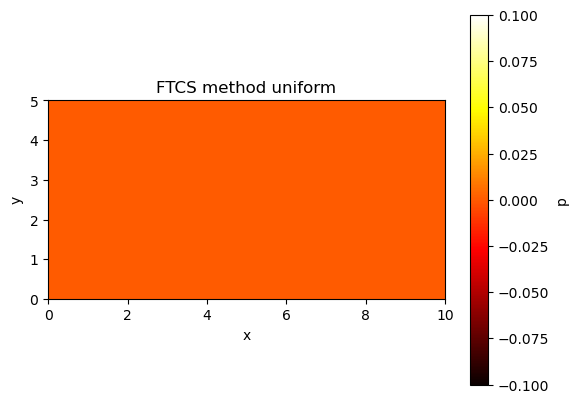

In [47]:
result=FTCS_first(pin)
plt.imshow(result, extent=[0, Lx, 0, Ly], origin='lower', cmap='hot', interpolation='nearest')
plt.colorbar(label='p')
plt.title('FTCS method uniform')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 2. Initail and Boundary conditions

fixed along y and periodic along x

In [48]:
pin=np.zeros((nx,ny))
pin[:, 0] = 20
pin[:, -1] = 10


In [49]:
def FTCS_second(p):
    p_new=np.copy(p)
    for n in range(nt):
        p[0,:]=p[-2,:]   #  left along x
        p[-1,:]=p[1,:]    #  right along x
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                p_new[i,j]=p[i,j]+D*dt/dx**2*(p[i+1,j]-2.0*p[i,j]+p[i-1,j])+D*dt/dy**2*(p[i,j+1]-2.0*p[i,j]+p[i,j-1])                
        p[:] = p_new[:]
    return p

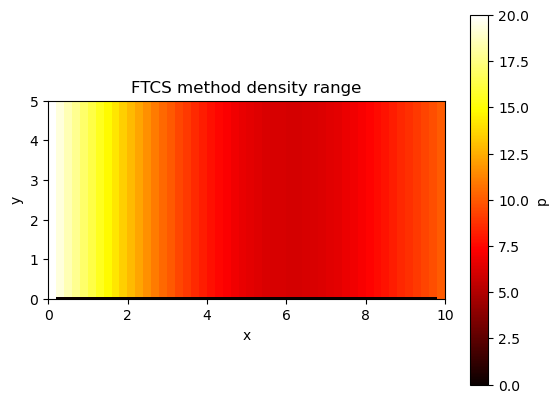

In [50]:
result=FTCS_second(pin)
plt.imshow(result, extent=[0, Lx, 0, Ly], origin='lower', cmap='hot', interpolation='nearest')
plt.colorbar(label='p')
plt.title('FTCS method density range')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
